In [9]:
from pandas import Series, DataFrame
fruitData = {'fruitName' : ['apple', 'banana', 'cherry', 'peer'],
             'fruitPrice' : [2500,3800,6000,1200],
             'num' : [10,5,3,8]}


In [38]:
fruitName = fruitData['fruitName']
fruitFrame = DataFrame(fruitData,index = fruitName, columns = ['fruitPrice', 'num'])
fruitFrame2 = fruitFrame.drop(['apple', 'cherry']) #delete index, axis=0 (0 : default = index)
fruitFrame3 = fruitFrame.drop(['fruitPrice'], axis =1) #delete column, axis=1 (1 -> column?)
print(fruitFrame)
print(fruitFrame2)
print(fruitFrame3)

        fruitPrice  num
apple         2500   10
banana        3800    5
cherry        6000    3
peer          1200    8
        fruitPrice  num
banana        3800    5
peer          1200    8
        num
apple    10
banana    5
cherry    3
peer      8


In [19]:
fruitName = fruitData['fruitName']
fruitFrame = DataFrame(fruitData, index = fruitName, columns = ['fruitPrice', 'num'])
print(fruitFrame)
print(fruitFrame['fruitPrice'])
print(fruitFrame['apple':'banana'])

        fruitPrice  num
apple         2500   10
banana        3800    5
cherry        6000    3
peer          1200    8
apple     2500
banana    3800
cherry    6000
peer      1200
Name: fruitPrice, dtype: int64
        fruitPrice  num
apple         2500   10
banana        3800    5


In [40]:
fruitData1 = {'Ohio' : [4,8,3,5],'Texas' : [0,1,2,3]} 
fruitFrame1 = DataFrame(fruitData1,columns=['Ohio','Texas'],index = ['apple','banana','cherry','peer']) 
fruitData2 = {'Ohio' : [3,0,2,1,7],'Colorado':[5,4,3,6,0]} 
fruitFrame2 = DataFrame(fruitData2,columns =['Ohio','Colorado'],index = ['apple','orange','banana','cherry','mango'])
print(fruitFrame1) 
print(fruitFrame2) 
print(fruitFrame1 + fruitFrame2)

# Dataframe 은 column 이 존재하기 때문에 column 까지 같이 모두 함께 연산된다. 
# 컬럼 또한 NaN이 하나라도 존재하는 row는 모두 NaN 처리가 된다.

        Ohio  Texas
apple      4      0
banana     8      1
cherry     3      2
peer       5      3
        Ohio  Colorado
apple      3         5
orange     0         4
banana     2         3
cherry     1         6
mango      7         0
        Colorado  Ohio  Texas
apple        NaN   7.0    NaN
banana       NaN  10.0    NaN
cherry       NaN   4.0    NaN
mango        NaN   NaN    NaN
orange       NaN   NaN    NaN
peer         NaN   NaN    NaN


In [43]:
fruitName = fruitData['fruitName']
fruitFrame = DataFrame(fruitData, index=fruitName, columns = ['num', 'fruitPrice'])
print(fruitFrame)
print(fruitFrame.sort_index()) #sort by index
print(fruitFrame.sort_index(axis=1)) #sort by column

        num  fruitPrice
apple    10        2500
banana    5        3800
cherry    3        6000
peer      8        1200
        num  fruitPrice
apple    10        2500
banana    5        3800
cherry    3        6000
peer      8        1200
        fruitPrice  num
apple         2500   10
banana        3800    5
cherry        6000    3
peer          1200    8


In [48]:
fruitFrame.sort_values(by=['fruitPrice', 'num'])
# 기준을 여러칼럼으로 하고 싶을 때는 by 안의 리스트에 여러 개의 column 이름을 지정하면 된다.

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


In [78]:
german = pd.read_csv("http://freakonometrics.free.fr/german_credit.csv")
german_sample = DataFrame(german, columns = ['Creditability', 'Account Balance', 
                       'Duration of Credit (month)', 'Payment Status of Previous Credit'])

In [83]:
print(list(german_sample.columns))
print(german_sample.min())
print(german_sample.max())
print(german_sample.mean())
print(german_sample.describe())

['Creditability', 'Account Balance', 'Duration of Credit (month)', 'Payment Status of Previous Credit']
Creditability                        0
Account Balance                      1
Duration of Credit (month)           4
Payment Status of Previous Credit    0
dtype: int64
Creditability                         1
Account Balance                       4
Duration of Credit (month)           72
Payment Status of Previous Credit     4
dtype: int64
Creditability                         0.700
Account Balance                       2.577
Duration of Credit (month)           20.903
Payment Status of Previous Credit     2.545
dtype: float64
       Creditability  Account Balance  Duration of Credit (month)  \
count    1000.000000      1000.000000                 1000.000000   
mean        0.700000         2.577000                   20.903000   
std         0.458487         1.257638                   12.058814   
min         0.000000         1.000000                    4.000000   
25%         0.0000

In [94]:
german_grouped=german['Credit Amount'].groupby(german['Type of apartment']) 
german_grouped.mean()

german_grouped2 = german['Credit Amount'].groupby([german['Purpose'],german['Type of apartment']])
german_grouped2.mean()

Purpose  Type of apartment
0        1                    2597.225000
         2                    2811.024242
         3                    5138.689655
1        1                    5037.086957
         2                    4915.222222
         3                    6609.923077
2        1                    2727.354167
         2                    3107.450820
         3                    4100.181818
3        1                    2199.763158
         2                    2540.533040
         3                    2417.333333
4        1                    1255.500000
         2                    1546.500000
5        1                    1522.000000
         2                    2866.000000
         3                    2750.666667
6        1                    3156.444444
         2                    2492.423077
         3                    4387.266667
8        1                     902.000000
         2                    1243.875000
9        1                    5614.125000
       

In [103]:
german=pd.read_csv("http://freakonometrics.free.fr/german_credit.csv")
german_sample = german[['Type of apartment', 'Sex & Marital Status', 'Credit Amount']]
german_sample.groupby('Type of apartment')
for type, group in german_sample.groupby('Type of apartment'):
    print(type)
    print(group.head(n=3))

1
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
2
   Type of apartment  Sex & Marital Status  Credit Amount
4                  2                     3           2171
6                  2                     3           3398
7                  2                     3           1361
3
    Type of apartment  Sex & Marital Status  Credit Amount
29                  3                     3           4796
44                  3                     3           1239
69                  3                     3           2032


In [105]:
import numpy as np

In [120]:
arr = np.array([1,2,3,4])
print(arr)

[1 2 3 4]


In [116]:
print(np.zeros((3,3)))
print(np.ones((2,2)))
print(np.empty((4,4)))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  1.]
 [ 1.  1.]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [126]:
print(np.arange(10))
print(np.array([[1,2,3],[4,5,6]]))

arr = np.array([[1,2,3],[4,5,6]])
print(arr.shape)
print(arr.ndim)
print(arr.dtype)

[0 1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]]
(2, 3)
2
int64


In [131]:
arr_int = np.array([1,2,3,4])
arr_float = arr_int.astype(np.float64)
print(arr_int.dtype)
print(arr_float.dtype)

arr_str = np.array(['1', '2', '3'])
arr_int = arr_str.astype(np.int64)
print(arr_str.dtype)
print(arr_int.dtype)

int64
float64
<U1
int64


In [135]:
arr1 = np.array([[1,2], [3,4]])
arr2 = np.array([[5,6], [7,8]])
print(arr1 + arr2)
print(arr1 - arr2)
print(arr1 * arr2)
print(arr1 / arr2)

arr1.dot(arr2)
np.dot(arr1, arr2)

[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]
[[ 5 12]
 [21 32]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


array([[19, 22],
       [43, 50]])

In [145]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr_1 = arr[:2,1:3]
arr_2 = arr[0,2]
arr_3 = arr[[0,1,2],[2,0,1]]

print(arr_1)
print(arr_2)
print(arr_3)
print()

arr = np.array([[1,2,3],[4,5,6]])
idx = arr > 3 #make boolean array (shape of arr)
print(idx)
print(arr[idx])

[[2 3]
 [5 6]]
3
[3 4 8]

[[False False False]
 [ True  True  True]]
[4 5 6]


In [173]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                     delimiter = ';', skiprows = 1)
# wget http://goo.gl/EKPKth
# mv EKPKth winequality-red.csv
# redwine = np.loadtxt(fname = '/home/eduuser/winequality-red.csv', delimiter = ';', skiprows = 1)

# numpy라이브러리 안에 loadtxt함수를 실행하여 텍스트 파일을 불러올 수 있다. 
# fname에는winequality-red.csv파일이 위치한 디렉토리를 입력한다. 
# csv파일의 구분자가 ; 이기 때문에 delimiter=’;’을 해주고, 변수인 첫 행은 불러 오지 않기 때문에 skiprows=1를 해준다.

print(redwine.sum())
print(redwine.mean())
print(redwine.mean(axis = 0))

print(redwine.max(axis = 0))
print(redwine.min(axis = 0))

7.4       13295.70000
0.7         843.28500
0           433.29000
1.9        4057.65000
0.076       139.78300
11        25373.00000
34        74268.00000
0.9978     1592.80014
3.51       5290.96000
0.56       1051.82000
9.4       16656.95000
5          9007.00000
dtype: float64
7.4        8.320213
0.7        0.527713
0          0.271145
1.9        2.539205
0.076      0.087474
11        15.877972
34        46.475594
0.9978     0.996746
3.51       3.310989
0.56       0.658210
9.4       10.423623
5          5.636421
dtype: float64
7.4        8.320213
0.7        0.527713
0          0.271145
1.9        2.539205
0.076      0.087474
11        15.877972
34        46.475594
0.9978     0.996746
3.51       3.310989
0.56       0.658210
9.4       10.423623
5          5.636421
dtype: float64
7.4        15.90000
0.7         1.58000
0           1.00000
1.9        15.50000
0.076       0.61100
11         72.00000
34        289.00000
0.9978      1.00369
3.51        4.01000
0.56        2.00000
9.4        

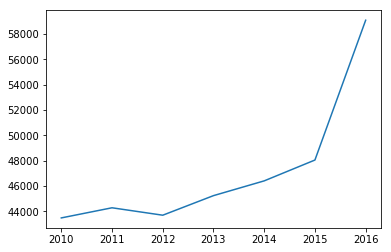

In [175]:
import matplotlib.pyplot as plt
plt.plot([2010,2011,2012,2013,2014,2015,2016],
         [43475, 44276, 43689, 45236, 46403, 48050, 59098])
plt.show()

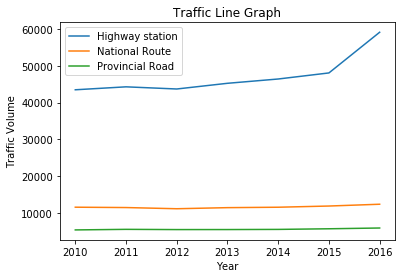

In [178]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
y1 = [43475, 44276, 43689, 45236, 46403, 48050, 59098]
y2 = [11594, 11499, 11176, 11471, 11587, 11911, 12399]
y3 = [5426, 5580, 5517, 5524, 5566, 5735, 5944]

plt.plot(x, y1, label="Highway station")
plt.plot(x, y2, label="National Route")
plt.plot(x, y3, label="Provincial Road")


plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Line Graph")

plt.legend()
plt.show()